In [46]:
# Step 1: Import Required Libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder


In [47]:
# Step 2: Define the Dataset Directory
extraction_dir = '/kaggle/input/braintumor-detection-1/Braintumor Detection'

# Verify the contents of the directory to ensure the data is there
print("Directory contents:", os.listdir(extraction_dir))

# Categories (subfolders) within the extraction directory
categories = ['glioma', 'notumor', 'meningioma', 'pituitary']


Directory contents: ['pituitary', 'notumor', 'meningioma', 'glioma']


In [48]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

# Function to load and preprocess images
def load_and_preprocess_images(base_dir, categories, target_size=(150, 150)):
    images = []
    labels = []
    
    for category in categories:
        folder_path = os.path.join(base_dir, category)
        image_files = os.listdir(folder_path)
        
        for img_file in image_files:
            img_full_path = os.path.join(folder_path, img_file)
            
            # Load the image
            try:
                img = image.load_img(img_full_path, target_size=target_size)
                img_array = image.img_to_array(img)
                img_array /= 255.0  # Normalize pixel values (0-1)
                images.append(img_array)
                labels.append(category)  # Ensure the correct category is being appended
            except Exception as e:
                print(f"Error loading image {img_full_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load the images and labels
X, y = load_and_preprocess_images(extraction_dir, categories)

# Print the first few labels to see if they are loaded correctly
print("Labels after loading images:", y)

# Check unique labels before encoding
unique_labels, counts = np.unique(y, return_counts=True)
print("Unique labels and their counts:", dict(zip(unique_labels, counts)))

# Step 4: Encode Labels
label_encoder = LabelEncoder()

# Check the type of y before encoding
print("Type of y before encoding:", type(y))
print("Data type of y elements:", type(y[0]))

y_encoded = label_encoder.fit_transform(y)

# Verify label encoding
print("Label classes:", label_encoder.classes_)
print("Encoded labels:", y_encoded[:10])  # Show first 10 encoded labels

# Verify unique encoded labels
unique_encoded_labels, encoded_counts = np.unique(y_encoded, return_counts=True)
print("Unique encoded labels and their counts:", dict(zip(unique_encoded_labels, encoded_counts)))


Labels after loading images: ['glioma' 'glioma' 'glioma' ... 'pituitary' 'pituitary' 'pituitary']
Unique labels and their counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Type of y before encoding: <class 'numpy.ndarray'>
Data type of y elements: <class 'numpy.str_'>
Label classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
Encoded labels: [0 0 0 0 0 0 0 0 0 0]
Unique encoded labels and their counts: {0: 1321, 1: 1339, 2: 1595, 3: 1457}


In [49]:
for category in categories:
    folder_path = os.path.join(extraction_dir, category)

X, y = load_and_preprocess_images(extraction_dir, categories)
print("Labels after loading images:", y)



Labels after loading images: ['glioma' 'glioma' 'glioma' ... 'pituitary' 'pituitary' 'pituitary']


In [50]:
unique, counts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))


Class counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


In [51]:
# Step 4: Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify label encoding
print("Label classes:", label_encoder.classes_)
print("Encoded labels:", y_encoded[:10])


Label classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
Encoded labels: [0 0 0 0 0 0 0 0 0 0]


In [64]:
# Step 5: Define Train-Test Ratios
ratios = [(0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)] 
test_accuracies = []
train_accuracies = []
confusion_matrices = []
classification_reports = []


In [65]:
# Step 6: Create the CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


**Model Accuracy for Different Train Test Split**

In [65]:
# Step 7: Train and Evaluate the Model
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)
    
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1) 

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)



Train/Test Split: 30% Train / 70% Test
Training samples: 1713
Testing samples: 3999
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 752ms/step - accuracy: 0.5021 - loss: 1.2038
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.7838 - loss: 0.5313
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 757ms/step - accuracy: 0.8728 - loss: 0.3426
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 752ms/step - accuracy: 0.9240 - loss: 0.2086
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 751ms/step - accuracy: 0.9570 - loss: 0.1396
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.9755 - loss: 0.0805
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 754ms/step - accuracy: 0.9908 - loss: 0.0455
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9937 - loss: 0.0212
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 769ms/step - accuracy: 0.9923 - loss: 0.0202
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 760ms/step - accuracy: 0.9956 - loss: 0.0153
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - a

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Step 6: Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)

# Initialize lists to store confusion matrices and classification reports
confusion_matrices = []
classification_reports = []

    
    # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm)

125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 239ms/step


In [67]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")

# Classification report
    cr = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    classification_reports.append(cr)  # Append the classification report

    # Print Classification Report with the correct format
    print(f"Classification Report for {int(train_ratio * 100)}% Train:")
    print(cr)


Train/Test Split: 30% Train / 70% Test
Classification Report for 30% Train:
              precision    recall  f1-score   support

      glioma       0.84      0.82      0.83       933
  meningioma       0.72      0.77      0.75       915
     notumor       0.97      0.89      0.93      1126
   pituitary       0.91      0.96      0.93      1025

    accuracy                           0.86      3999
   macro avg       0.86      0.86      0.86      3999
weighted avg       0.87      0.86      0.86      3999


Train/Test Split: 50% Train / 50% Test
Classification Report for 50% Train:
              precision    recall  f1-score   support

      glioma       0.84      0.82      0.83       933
  meningioma       0.72      0.77      0.75       915
     notumor       0.97      0.89      0.93      1126
   pituitary       0.91      0.96      0.93      1025

    accuracy                           0.86      3999
   macro avg       0.86      0.86      0.86      3999
weighted avg       0.87      0.


Train/Test Split: 30% Train / 70% Test


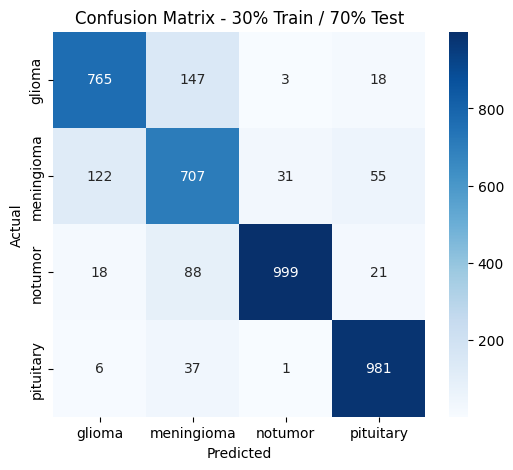


Train/Test Split: 50% Train / 50% Test


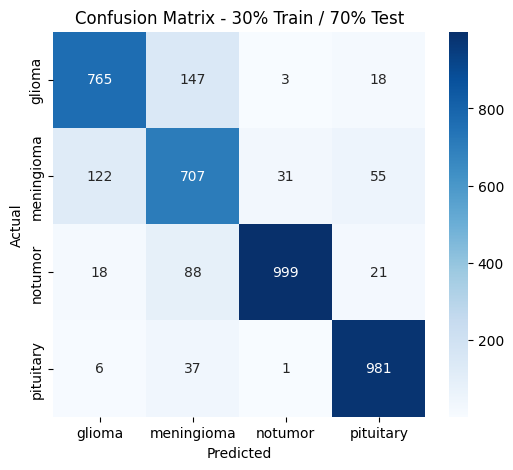


Train/Test Split: 70% Train / 30% Test


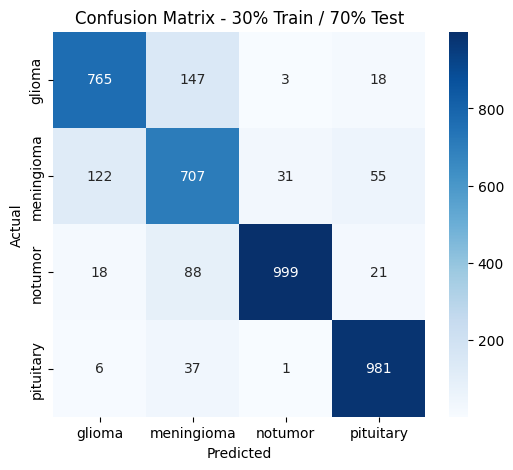


Train/Test Split: 90% Train / 10% Test


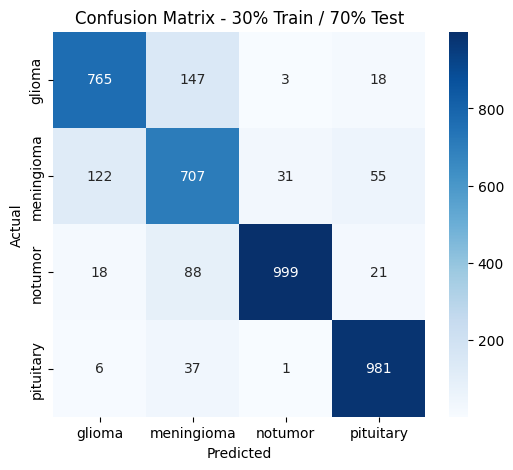

In [68]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")
    
    ratios_percent = [f"{int(train_ratio * 100)}%" for train_ratio, _ in ratios]

    
    import seaborn as sns
# Plot Confusion Matrix for each ratio

    for i, (train_ratio, cm) in enumerate(zip(ratios_percent, confusion_matrices)):
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix - {train_ratio} Train / {100 - int(train_ratio[:-1])}% Test")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

In [73]:
for train_ratio, test_ratio in ratios:
    print(f"\nTrain/Test Split: {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)


Train/Test Split: 30% Train / 70% Test

Train/Test Split: 50% Train / 50% Test

Train/Test Split: 70% Train / 30% Test

Train/Test Split: 90% Train / 10% Test


**K fold Cross Validation**

In [86]:
ratios = [(0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]
k = 5  # Number of folds for K-Fold Cross Validation


In [87]:
train_accuracies = []
test_accuracies = []
confusion_matrices = []
classification_reports = []


In [ ]:
for train_ratio, test_ratio in ratios:
    print(f"\n\nPerforming K-Fold for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")
    
    # Split the dataset according to the current ratio
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)
    
    print(f"Training samples: {len(X_train_val)}, Testing samples: {len(X_test)}")
    
    # K-Fold for the current train-test split
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # To store the accuracies for this ratio
    fold_train_accuracies = []
    fold_test_accuracies = []

    # Perform K-Fold Cross-Validation
    for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
        print(f"\nFold {fold + 1}/{k}")
        
        # Split the data into train and validation sets for the current fold
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]
        
        # Create the model
        model = create_model()
        
        # Train the model on the current fold's training set
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
        
        # Evaluate the model on the current fold's training set
        train_loss, train_accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)
        fold_train_accuracies.append(train_accuracy)
        
        # Evaluate the model on the current fold's validation set
        val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        fold_test_accuracies.append(val_accuracy)
        
        print(f"Train Accuracy for Fold {fold + 1}: {train_accuracy:.4f}")
        print(f"Validation Accuracy for Fold {fold + 1}: {val_accuracy:.4f}")
    
    # Calculate the average accuracies for the current ratio's K-Fold cross-validation
    average_train_accuracy = np.mean(fold_train_accuracies)
    average_val_accuracy = np.mean(fold_test_accuracies)
    
    print(f"\nAverage Train Accuracy for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test: {average_train_accuracy:.4f}")
    print(f"Average Validation Accuracy for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test: {average_val_accuracy:.4f}")
    
    # Final Test Evaluation on the holdout test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test: {test_accuracy:.4f}")
    
    # Store the accuracies for plotting
    train_accuracies.append(average_train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    confusion_matrices.append(cm)
    
    # Classification Report
    cr = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
    classification_reports.append(cr)
    print(f"\nClassification Report for {int(train_ratio * 100)}% Train:\n{cr}")


**Configure Model with Different Activation Fn, Pooling and Dropuot**

In [91]:
# Define the path where the dataset is stored
extraction_dir = '/kaggle/input/braintumor-detection-1/Braintumor Detection'

# Function to load and preprocess images
def load_and_preprocess_images(base_dir, categories, target_size=(150, 150)):
    images = []
    labels = []
    
    for category in categories:
        folder_path = os.path.join(base_dir, category)
        image_files = os.listdir(folder_path)
        
        for img_file in image_files:
            img_full_path = os.path.join(folder_path, img_file)
            img = image.load_img(img_full_path, target_size=target_size)
            img_array = image.img_to_array(img) / 255.0  # Normalize pixel values (0-1)
            images.append(img_array)
            labels.append(category)
    
    return np.array(images), np.array(labels)

categories = ['glioma', 'notumor', 'meningioma', 'pituitary']
X, y = load_and_preprocess_images(extraction_dir, categories)

# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [93]:
def create_model(dropout=False, activation='relu', pooling='max'):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=(150, 150, 3)))
    if pooling == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    else:
        model.add(AveragePooling2D(pool_size=(2, 2)))  
    
    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation=activation))
    if pooling == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    else:
        model.add(AveragePooling2D(pool_size=(2, 2)))
    
    # Dropout Layer if specified
    if dropout:
        model.add(Dropout(0.5))
    
    # Flatten and Output Layer
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(len(categories), activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [98]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.preprocessing import image


In [99]:
# Define train/test split
train_ratio = 0.9
test_ratio = 0.1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)

# Configurations to test
configurations = [
    {'dropout': True, 'activation': 'relu', 'pooling': 'max'},
    {'dropout': True, 'activation': 'relu', 'pooling': 'avg'},
    {'dropout': False, 'activation': 'relu', 'pooling': 'max'},
    {'dropout': False, 'activation': 'relu', 'pooling': 'avg'},
    {'dropout': True, 'activation': 'sigmoid', 'pooling': 'max'},
    {'dropout': True, 'activation': 'sigmoid', 'pooling': 'avg'},
    {'dropout': False, 'activation': 'sigmoid', 'pooling': 'max'},
    {'dropout': False, 'activation': 'sigmoid', 'pooling': 'avg'},
]

results = []

for config in configurations:
    print(f"Training with config: {config}")
    model = create_model(dropout=config['dropout'], activation=config['activation'], pooling=config['pooling'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)  
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0) 
    results.append((config, test_accuracy))  # Store results
    print(f"Test Accuracy: {test_accuracy:.4f}")


Training with config: {'dropout': True, 'activation': 'relu', 'pooling': 'max'}
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 657ms/step - accuracy: 0.6041 - loss: 1.0638
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 140s 648ms/step - accuracy: 0.8976 - loss: 0.3035
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 106s 656ms/step - accuracy: 0.9390 - loss: 0.1683
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 657ms/step - accuracy: 0.9584 - loss: 0.1181
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 105s 653ms/step - accuracy: 0.9791 - loss: 0.0682
Test Accuracy: 0.9336
Training with config: {'dropout': True, 'activation': 'relu', 'pooling': 'avg'}
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 103s 628ms/step - accuracy: 0.6423 - loss: 0.8245
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 139s 609ms/step - accuracy: 0.8852 - loss: 0.3183
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 98s 611ms/step - accuracy: 0.9270 - loss: 0.1940
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 99s 617ms/step - accuracy: 0.9608 - loss: 0.1137
Epoch 5/5
161/161 ━

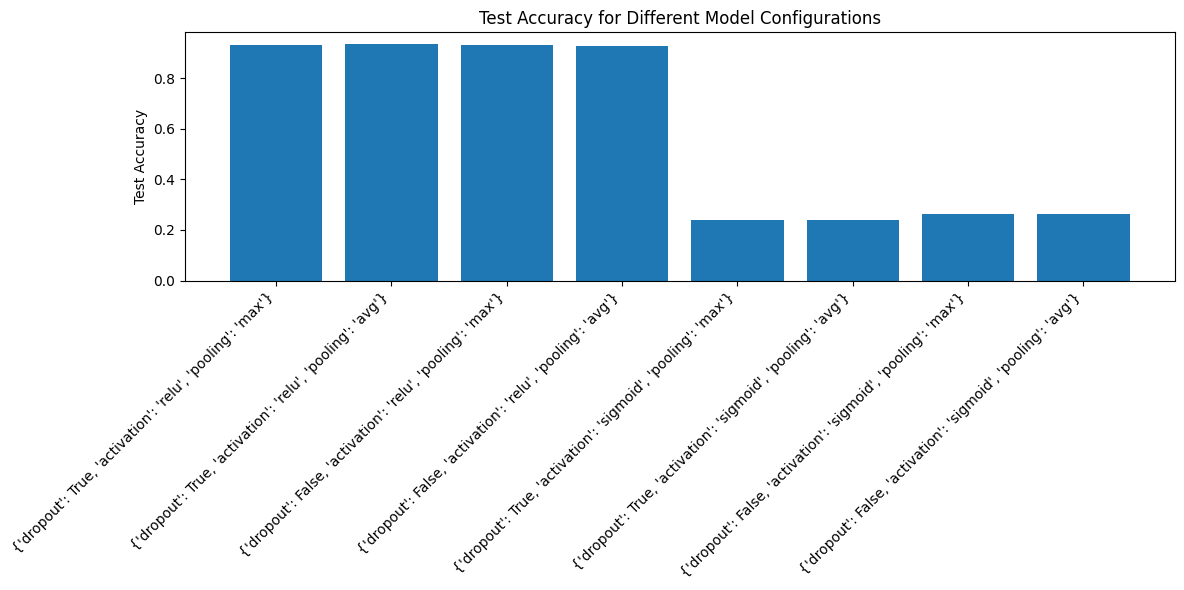

In [100]:
# Separate the configurations and their corresponding accuracies
configs, accuracies = zip(*results)

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.bar(range(len(configs)), accuracies, tick_label=[str(config) for config in configs])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Model Configurations')
plt.tight_layout()
plt.show()


**Weight Initializer and Learning Rate**

In [103]:
from tensorflow.keras.initializers import HeNormal, GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Conv2D
from tensorflow.keras.models import Sequential

# Define the model creation function with weight initializer, learning rate, and dropout as parameters
def create_configurable_model(weight_initializer, learning_rate, dropout=True):
    model = Sequential()

    # First Convolutional Layer with configurable initializer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=weight_initializer, input_shape=(150, 150, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=weight_initializer))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=weight_initializer))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten the model
    model.add(Flatten())

    # Fully connected Dense layer with optional Dropout
    model.add(Dense(128, activation='relu', kernel_initializer=weight_initializer))
    if dropout:
        model.add(Dropout(0.5))  # Dropout to avoid overfitting

    # Output Layer
    model.add(Dense(len(categories), activation='softmax'))

    # Compile the model with Adam optimizer and the given learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model



In [105]:
# Configurations to compare
configurations = [
    {'initializer': HeNormal(), 'learning_rate': 0.001},
    {'initializer': GlorotUniform(), 'learning_rate': 0.001},
    {'initializer': HeNormal(), 'learning_rate': 0.0001},
    {'initializer': GlorotUniform(), 'learning_rate': 0.0001},
]

# Iterate through each configuration
for config in configurations:
    print(f"\nTraining with config: Weight Initializer = {config['initializer'].__class__.__name__}, Learning Rate = {config['learning_rate']}")
    
    # Create the model with the current configuration
    model = create_configurable_model(config['initializer'], config['learning_rate'])

    # Split the dataset (90% train, 10% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.9, test_size=0.1, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")



Training with config: Weight Initializer = HeNormal, Learning Rate = 0.001
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 112s 674ms/step - accuracy: 0.5755 - loss: 1.2144
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 673ms/step - accuracy: 0.8514 - loss: 0.4139
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 687ms/step - accuracy: 0.8937 - loss: 0.3148
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 673ms/step - accuracy: 0.9029 - loss: 0.2723
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 670ms/step - accuracy: 0.9280 - loss: 0.2070
Test Accuracy: 0.9336

Training with config: Weight Initializer = GlorotUniform, Learning Rate = 0.001
Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 111s 676ms/step - accuracy: 0.6034 - loss: 0.9681
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 672ms/step - accuracy: 0.8406 - loss: 0.4463
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 110s 682ms/step - accuracy: 0.8810 - loss: 0.3246
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 109s 674ms/step - accuracy: 0.9045 - loss: 0.2616
Epoch 5/5
161/161 ━━

In [74]:
# Define your ratios and K value for K-Fold Cross Validation
ratios = [(0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]
k = 5

# To store accuracies and metrics for plotting
train_accuracies = []
test_accuracies = []
confusion_matrices = []
classification_reports = []


In [75]:
# Loop Over Each Train-Test Ratio
for train_ratio, test_ratio in ratios:
    print(f"\n\nPerforming K-Fold for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test")
    
    # Split the dataset according to the current ratio
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, train_size=train_ratio, test_size=test_ratio, random_state=42)
    
    print(f"Training samples: {len(X_train_val)}, Testing samples: {len(X_test)}")
    
    # K-Fold for the current train-test split
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # To store predictions for confusion matrix and classification report
    y_pred_list = []
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
        print(f"\nFold {fold + 1}/{k}")
        
        # Split the data into train and validation sets for the current fold
        X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
        y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]



Performing K-Fold for 30% Train / 70% Test
Training samples: 1713, Testing samples: 3999

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


Performing K-Fold for 50% Train / 50% Test
Training samples: 2856, Testing samples: 2856

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


Performing K-Fold for 70% Train / 30% Test
Training samples: 3998, Testing samples: 1714

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


Performing K-Fold for 90% Train / 10% Test
Training samples: 5140, Testing samples: 572

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


In [76]:
        # Create the model
        model = create_model()
        
        # Train the model on the current fold's training set
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
        
        # Evaluate the model on the current fold's validation set
        val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
 print(f"Validation Accuracy for Fold {fold + 1}: {val_accuracy:.4f}")

Validation Accuracy for Fold 5: 0.9368


In [79]:
 # Final Test Evaluation on the holdout test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy for {int(train_ratio * 100)}% Train / {int(test_ratio * 100)}% Test: {test_accuracy:.4f}")

Test Accuracy for 90% Train / 10% Test: 0.9580


In [81]:
train_accuracies.append(np.mean(fold_accuracies))  # average of fold accuracies (you may calculate if you wish)
test_accuracies.append(test_accuracy)

In [83]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_list.extend(y_pred_classes)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step


ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

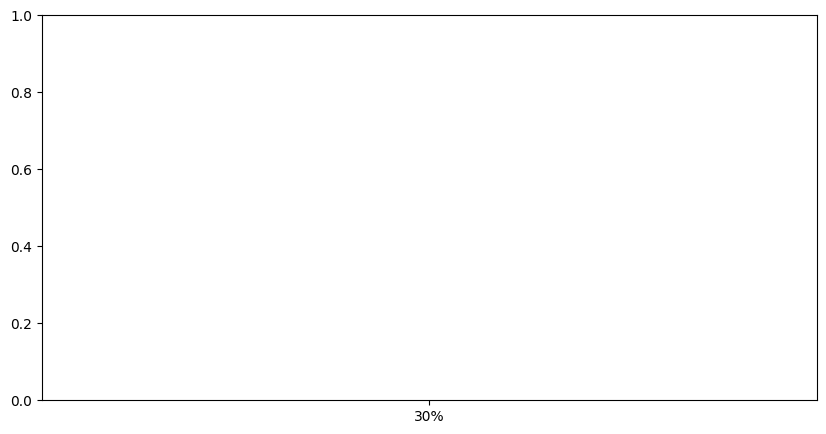

In [84]:
ratios_percent = [f"{int(train_ratio * 100)}%" for train_ratio, _ in ratios]

plt.figure(figsize=(10, 5))
plt.plot(ratios_percent, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Different Ratios')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()